In [237]:
#importing dataset into google colab
from google.colab import files
files.upload()

Saving asia_emission2.csv to asia_emission2 (1).csv


{'asia_emission2.csv': b'Year,Power_Industry,Buildings,Transport,Other_Industrial_Combustion,Other_Sectors,Total\r\n1/01/1970,1087.841453,758.6508773,406.1099618,1234.234325,724.7288782,4211.565495\r\n1/01/1971,1066.462437,767.4541927,413.4525281,1239.451562,767.4843462,4254.305066\r\n1/01/1972,1133.049824,811.2617993,437.6847444,1315.473435,824.1114735,4521.581276\r\n1/01/1973,1257.01006,859.896992,468.6970366,1400.411965,891.9802616,4877.996315\r\n1/01/1974,1307.009665,875.4021504,491.5926158,1450.544946,901.5936526,5026.14303\r\n1/01/1975,1386.018207,950.0614707,550.8461109,1538.005023,874.770857,5299.701669\r\n1/01/1976,1456.355826,971.4660914,572.1522777,1622.946832,945.3879404,5568.308968\r\n1/01/1977,1536.115773,1035.784293,606.3865001,1724.093962,963.2308546,5865.611383\r\n1/01/1978,1631.789553,1099.708152,640.8524378,1869.137441,1051.701543,6293.189127\r\n1/01/1979,1703.743586,1136.669232,672.7990606,1929.486984,1020.696156,6463.395019\r\n1/01/1980,1751.944079,1142.258789,681.

In [458]:
#importing needed libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [459]:
#loading csv dataset into pandas
df = pd.read_csv('asia_emission2.csv')

In [460]:
#checking datasets to make sure theer are no NaN values
df.head()

,Year,Power_Industry,Buildings,Transport,Other_Industrial_Combustion,Other_Sectors,Total
0,1/01/1970,1087.841453,758.650877,406.109962,1234.234325,724.728878,4211.565495
1,1/01/1971,1066.462437,767.454193,413.452528,1239.451562,767.484346,4254.305066
2,1/01/1972,1133.049824,811.261799,437.684744,1315.473435,824.111473,4521.581276
3,1/01/1973,1257.010060,859.896992,468.697037,1400.411965,891.980262,4877.996315
4,1/01/1974,1307.009665,875.402150,491.592616,1450.544946,901.593653,5026.143030


In [461]:
df.tail()

,Year,Power_Industry,Buildings,Transport,Other_Industrial_Combustion,Other_Sectors,Total
44,1/01/2014,8916.011256,1639.472416,2513.401985,5501.599128,2919.491195,21489.97598
45,1/01/2015,8929.631357,1670.495960,2622.037331,5447.411718,2937.306164,21606.88253
46,1/01/2016,9075.050962,1713.399506,2682.626387,5295.075504,3272.452902,22038.60526
47,1/01/2017,9212.887221,1767.423813,2745.756514,5395.826508,3304.254693,22426.14875
48,1/01/2018,9484.085310,1844.411632,2820.166999,5593.184478,3280.763165,23022.61158


In [462]:
df['Year']

0     1/01/1970
1     1/01/1971
2     1/01/1972
3     1/01/1973
4     1/01/1974
5     1/01/1975
6     1/01/1976
7     1/01/1977
8     1/01/1978
9     1/01/1979
10    1/01/1980
11    1/01/1981
12    1/01/1982
13    1/01/1983
14    1/01/1984
15    1/01/1985
16    1/01/1986
17    1/01/1987
18    1/01/1988
19    1/01/1989
20    1/01/1990
21    1/01/1991
22    1/01/1992
23    1/01/1993
24    1/01/1994
25    1/01/1995
26    1/01/1996
27    1/01/1997
28    1/01/1998
29    1/01/1999
30    1/01/2000
31    1/01/2001
32    1/01/2002
33    1/01/2003
34    1/01/2004
35    1/01/2005
36    1/01/2006
37    1/01/2007
38    1/01/2008
39    1/01/2009
40    1/01/2010
41    1/01/2011
42    1/01/2012
43    1/01/2013
44    1/01/2014
45    1/01/2015
46    1/01/2016
47    1/01/2017
48    1/01/2018
Name: Year, dtype: object

In [463]:
#changing the year column's datatype to datetime from object
df['Year'] = pd.to_datetime(df['Year'], format='%Y-%m-%d',infer_datetime_format=True)

In [464]:
df['Year']

0    1970-01-01
1    1971-01-01
2    1972-01-01
3    1973-01-01
4    1974-01-01
5    1975-01-01
6    1976-01-01
7    1977-01-01
8    1978-01-01
9    1979-01-01
10   1980-01-01
11   1981-01-01
12   1982-01-01
13   1983-01-01
14   1984-01-01
15   1985-01-01
16   1986-01-01
17   1987-01-01
18   1988-01-01
19   1989-01-01
20   1990-01-01
21   1991-01-01
22   1992-01-01
23   1993-01-01
24   1994-01-01
25   1995-01-01
26   1996-01-01
27   1997-01-01
28   1998-01-01
29   1999-01-01
30   2000-01-01
31   2001-01-01
32   2002-01-01
33   2003-01-01
34   2004-01-01
35   2005-01-01
36   2006-01-01
37   2007-01-01
38   2008-01-01
39   2009-01-01
40   2010-01-01
41   2011-01-01
42   2012-01-01
43   2013-01-01
44   2014-01-01
45   2015-01-01
46   2016-01-01
47   2017-01-01
48   2018-01-01
Name: Year, dtype: datetime64[ns]

In [465]:
#dropping all rows from dataset except for year and total emissions, ended up removing all extraneous columns and went with just predicting total carbon emissions due to timeframe
cols = ['Power_Industry','Buildings','Transport','Other_Industrial_Combustion','Other_Sectors']
df.drop(cols,axis=1,inplace=True)

In [466]:
df

,Year,Total
0,1970-01-01,4211.565495
1,1971-01-01,4254.305066
2,1972-01-01,4521.581276
3,1973-01-01,4877.996315
4,1974-01-01,5026.143030
5,1975-01-01,5299.701669
6,1976-01-01,5568.308968
7,1977-01-01,5865.611383
8,1978-01-01,6293.189127
9,1979-01-01,6463.395019


In [467]:
#setting row labels of dataframe to be Years for plotting
df = df.set_index('Year')['Total']

In [468]:
df.index  

DatetimeIndex(['1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

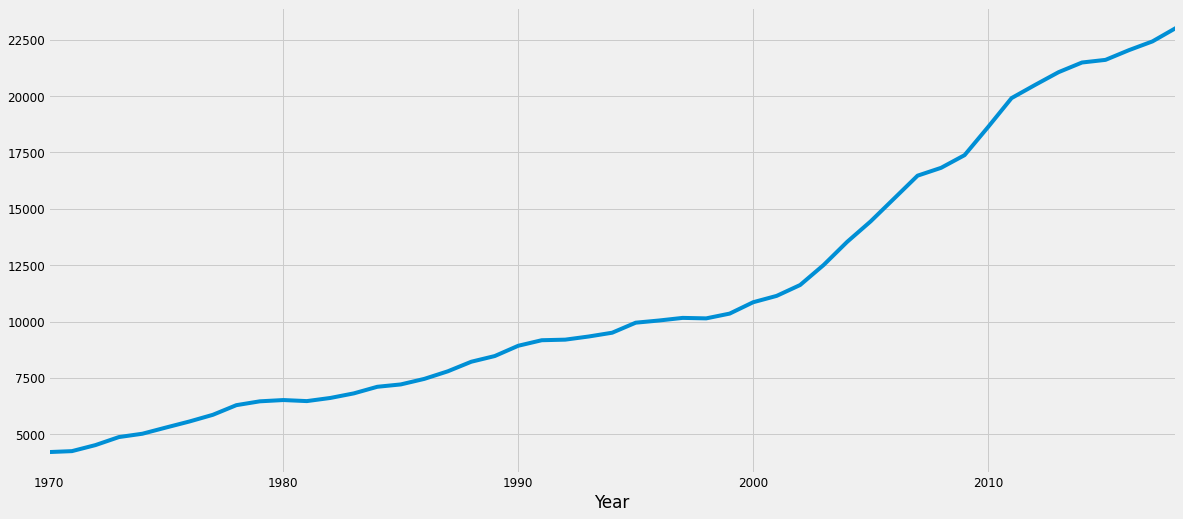

In [469]:
df.plot(figsize=(18, 8))
plt.show()

In [486]:
#automatically selecting the best parameters for the arima (p,d,q) inputs
#uses a grid search, iterating through different parameter combinations and returning back each parameters aic
#uses the sarimax function to fit the arima models being tested
#using this parameters with a low aic can be found, with a lower aic fitting the model better
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
s_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for ps in pdq:
  for param_seasonal in s_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(df,order=ps,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
      results = mod.fit()
      print('sarima{}x{} = AIC:{}'.format(ps,param_seasonal,results.aic))
    except:
      continue

sarima(0, 0, 0)x(0, 0, 0, 12) = AIC:1045.7807158584933
sarima(0, 0, 0)x(0, 0, 1, 12) = AIC:788.4073791777204
sarima(0, 0, 0)x(0, 1, 0, 12) = AIC:724.7927051109363
sarima(0, 0, 0)x(0, 1, 1, 12) = AIC:nan
sarima(0, 0, 0)x(1, 0, 0, 12) = AIC:656.6170116224164
sarima(0, 0, 0)x(1, 0, 1, 12) = AIC:629.9427020684523
sarima(0, 0, 0)x(1, 1, 0, 12) = AIC:468.3495691510586
sarima(0, 0, 0)x(1, 1, 1, 12) = AIC:nan
sarima(0, 0, 1)x(0, 0, 0, 12) = AIC:994.0750185550108
sarima(0, 0, 1)x(0, 0, 1, 12) = AIC:795.5777625974948
sarima(0, 0, 1)x(0, 1, 0, 12) = AIC:662.3899292087472
sarima(0, 0, 1)x(0, 1, 1, 12) = AIC:2035.111958789501
sarima(0, 0, 1)x(1, 0, 0, 12) = AIC:620.2241587587248
sarima(0, 0, 1)x(1, 0, 1, 12) = AIC:572.4180669800068
sarima(0, 0, 1)x(1, 1, 0, 12) = AIC:441.99764134388715
sarima(0, 0, 1)x(1, 1, 1, 12) = AIC:407.87188197956885
sarima(0, 1, 0)x(0, 0, 0, 12) = AIC:721.7279555898181
sarima(0, 1, 0)x(0, 0, 1, 12) = AIC:1727.8307986094067
sarima(0, 1, 0)x(0, 1, 0, 12) = AIC:532.680740217531

arima(1, 1, 0)x(1, 1, 0, 12) = AIC:339.1371018212848


In [471]:
#defining the sarimax model and putting the params found above into as the order
model = sm.tsa.statespace.SARIMAX(df,order=(1,1,0),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)

In [472]:
results = model.fit()

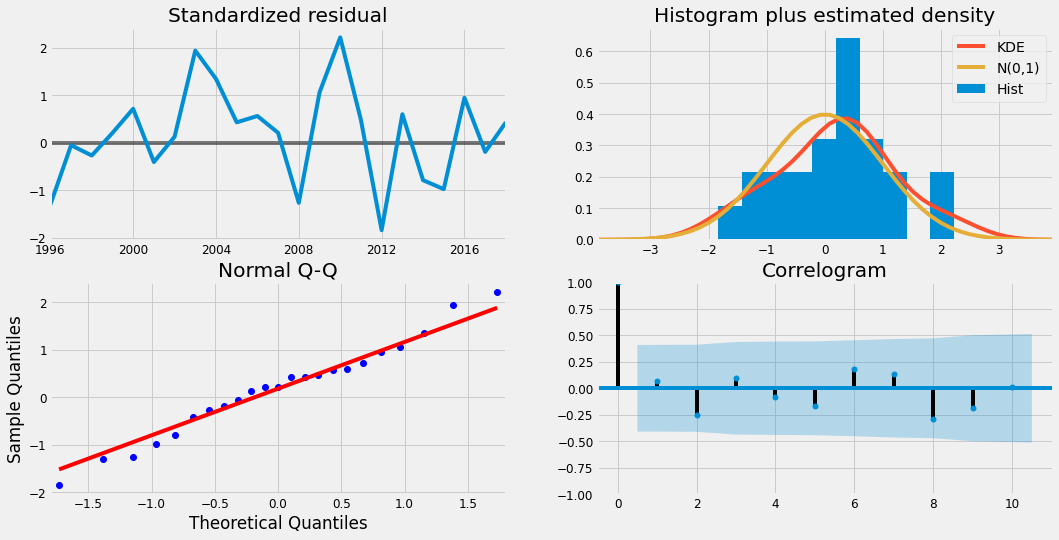

In [473]:
#checking models diagnostics to see if normally distributed (or atleast close to), using top right graph and bottom left to see if paramaters need to be changed
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [474]:
#defining prediction of emissions from 2000 to end of dataset
pred = results.get_prediction(start=pd.to_datetime('2000-01-01'),dynamic=False)

In [475]:
#defining confidence interval to plot 
pred_c = pred.conf_int()

<function matplotlib.pyplot.show>

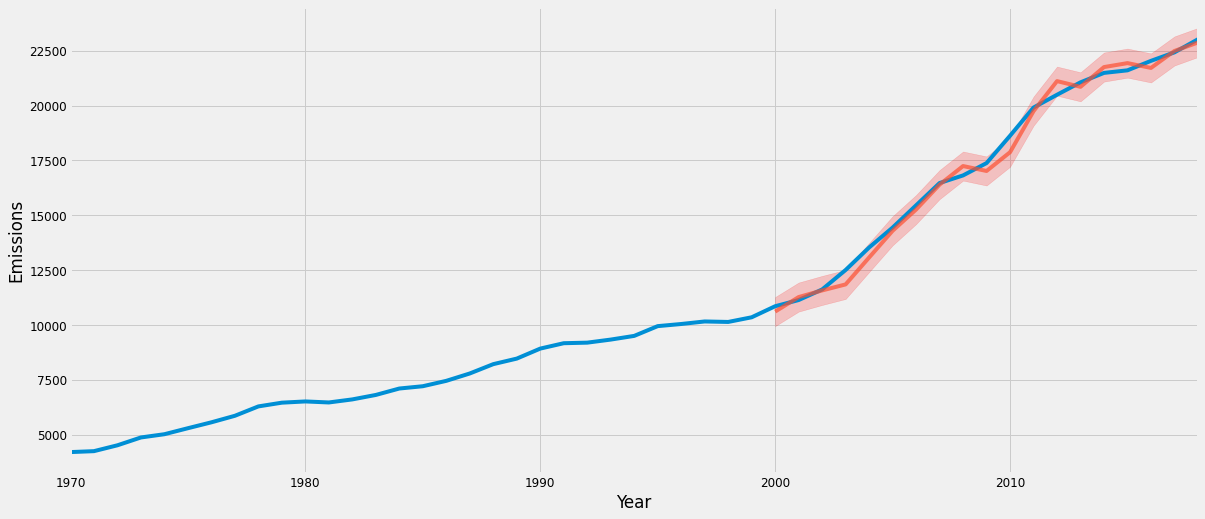

In [476]:
#plotting prediction versus true data to see model viability
ax = df['1970':].plot(label='True')
pred.predicted_mean.plot(ax=ax, label='Prediction',alpha=0.7,figsize=(18,8))
ax.set_xlabel('Year')
ax.set_ylabel ('Emissions')
#plotting confidence interval 
ax.fill_between(pred_c.index, pred_c.iloc[:,0], pred_c.iloc[:,1],color='r',alpha=0.2)
plt.legend
plt.show

<function matplotlib.pyplot.show>

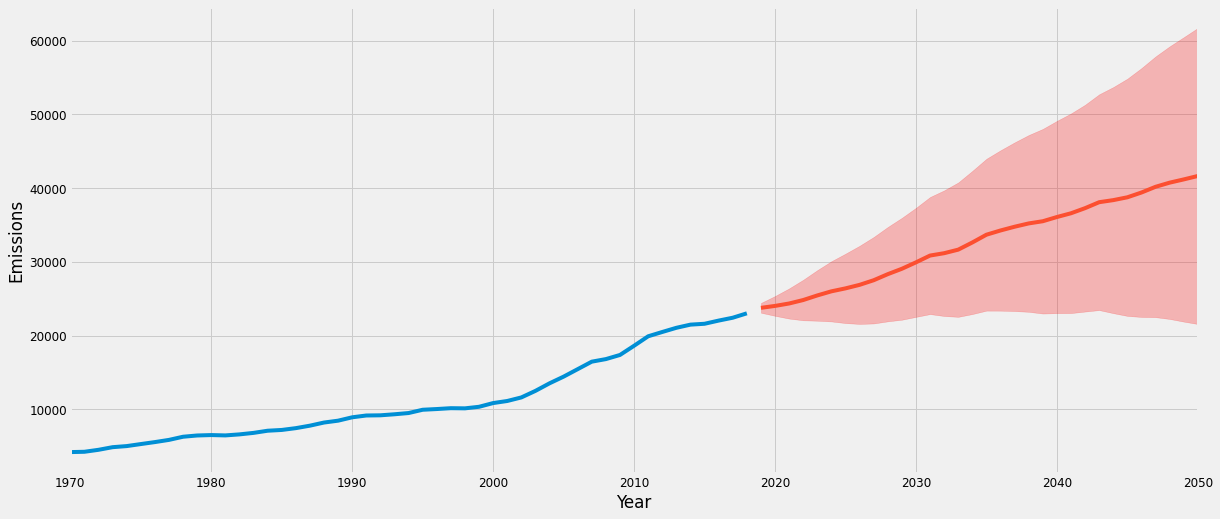

In [477]:
#predicting emissions for another 32 years into the future & getting confidence interval 
pred_uc = results.get_forecast(steps=32)
pred_c = pred_uc.conf_int()
ax = df.plot(label='True', figsize=(18,8))

#plotting predicted emissions & c
pred_uc.predicted_mean.plot(ax=ax, label=('Predicted'))
ax.fill_between(pred_c.index, pred_c.iloc[:, 0],pred_c.iloc[:, 1], color='r', alpha=0.25)
ax.set_xlabel('Year')
ax.set_ylabel('Emissions')
plt.legend
plt.show

In [478]:
#getting data into copyable table to put into excel, could export as csv but is easier to just copy from table using google colab
fcast = pred_uc.predicted_mean

In [479]:
final_prediction = fcast.to_frame()

In [480]:
final_prediction

,0
2019-01-01,23766.739610
2020-01-01,24026.563742
2021-01-01,24356.132045
2022-01-01,24825.211181
2023-01-01,25448.698031
2024-01-01,26004.990185
2025-01-01,26405.842564
2026-01-01,26883.436625
2027-01-01,27509.031612
2028-01-01,28331.973547
